In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
df = pd.read_excel('E:/Dropbox/Dropbox/covid_19_data.xlsx', parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 8 columns):
SNo                2379 non-null int64
ObservationDate    2379 non-null datetime64[ns]
Province/State     1718 non-null object
Country/Region     2379 non-null object
Last Update        2379 non-null datetime64[ns]
Confirmed          2379 non-null int64
Deaths             2379 non-null int64
Recovered          2379 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 148.8+ KB


In [90]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [91]:
agg_df = df[df['ObservationDate'] == '2020-02-25']
agg_df = agg_df.drop(columns = ['ObservationDate', 'SNo']).set_index('Country/Region')
agg_df = agg_df.sum(level = 'Country/Region').sort_values('Confirmed', ascending=False)

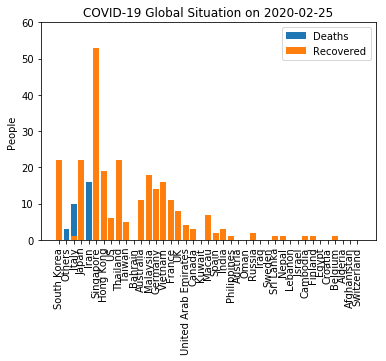

In [92]:
temp_df = agg_df.drop('Mainland China')
#Confirmed = temp_df['Confirmed']
Deaths = temp_df['Deaths']
Recovered = temp_df['Recovered']
ind = temp_df.index
width = 0.8
#p_Confirmed = plt.bar(ind, Confirmed, width)
p_Deaths = plt.bar(ind, Deaths, width)
p_Recovered = plt.bar(ind, Recovered, width)
plt.ylabel('People')
plt.title('COVID-19 Global Situation on 2020-02-25')
plt.xticks(ind, rotation=90)
plt.yticks(np.arange(0, 70, 10))
#plt.legend((p_Confirmed[0], p_Deaths[0], p_Recovered[0]), ('Confirmed', 'Deaths', 'Recovered'))
plt.legend((p_Deaths[0], p_Recovered[0]), ('Deaths', 'Recovered'))
plt.show()

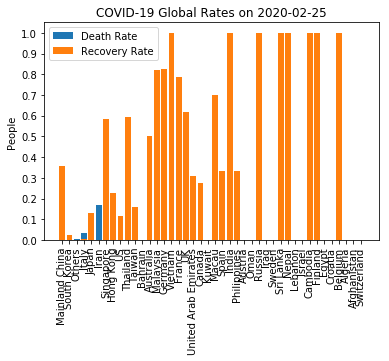

In [93]:
agg_df['Death Rate'] = agg_df['Deaths']/agg_df['Confirmed']
agg_df['Recovery Rate'] = agg_df['Recovered']/agg_df['Confirmed']
dr = agg_df['Death Rate']
rr = agg_df['Recovery Rate']
ind = agg_df.index
width = 0.8
p_dr = plt.bar(ind, dr, width)
p_rr = plt.bar(ind, rr, width)
plt.ylabel('People')
plt.title('COVID-19 Global Rates on 2020-02-25')
plt.xticks(ind, rotation=90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p_dr[0], p_rr[0]), ('Death Rate', 'Recovery Rate'))
plt.show()

In [94]:
agg_df['Death Rate Lower 95% CI Bound'] = agg_df['Death Rate']-1.96*np.sqrt(agg_df['Death Rate']*(1-agg_df['Death Rate'])/agg_df['Confirmed'])
agg_df['Death Rate Upper 95% CI Bound'] = agg_df['Death Rate']+1.96*np.sqrt(agg_df['Death Rate']*(1-agg_df['Death Rate'])/agg_df['Confirmed'])
agg_df['Recovery Rate Lower 95% CI Bound'] = agg_df['Recovery Rate']-1.96*np.sqrt(agg_df['Recovery Rate']*(1-agg_df['Recovery Rate'])/agg_df['Confirmed'])
agg_df['Recovery Rate Upper 95% CI Bound'] = agg_df['Recovery Rate']+1.96*np.sqrt(agg_df['Recovery Rate']*(1-agg_df['Recovery Rate'])/agg_df['Confirmed'])
agg_df.where(agg_df > 0, 0, inplace = True)
agg_df

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Death Rate Lower 95% CI Bound,Death Rate Upper 95% CI Bound,Recovery Rate Lower 95% CI Bound,Recovery Rate Upper 95% CI Bound
Country/Region,,,,,,,,,
Mainland China,77660,2663,27650,0.034290,0.356039,0.033011,0.035570,0.352671,0.359407
South Korea,977,10,22,0.010235,0.022518,0.003924,0.016547,0.013215,0.031821
Others,691,3,0,0.004342,0.000000,0.000000,0.009244,0.000000,0.000000
Italy,322,10,1,0.031056,0.003106,0.012109,0.050003,0.000000,0.009183
Japan,170,1,22,0.005882,0.129412,0.000000,0.017378,0.078954,0.179869
Iran,95,16,0,0.168421,0.000000,0.093165,0.243678,0.000000,0.000000
Singapore,91,0,53,0.000000,0.582418,0.000000,0.000000,0.481091,0.683744
Hong Kong,84,2,19,0.023810,0.226190,0.000000,0.056413,0.136722,0.315659
US,53,0,6,0.000000,0.113208,0.000000,0.000000,0.027904,0.198511


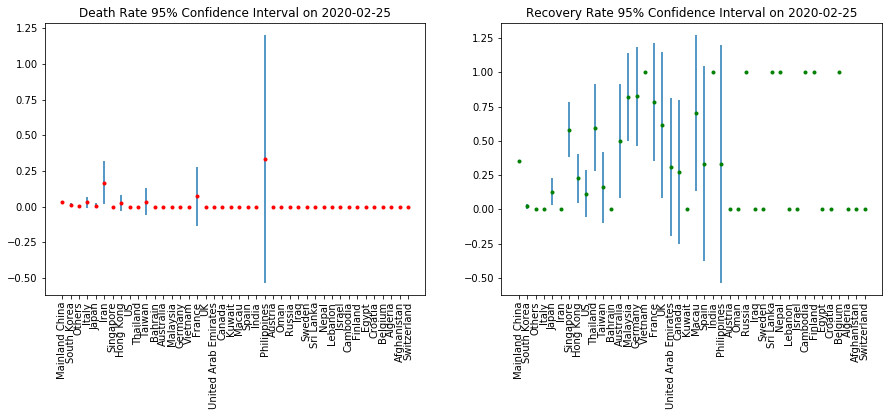

In [106]:
x = agg_df.index
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ls = 'None'
yd = agg_df['Death Rate']
errd = agg_df['Death Rate Upper 95% CI Bound'] - agg_df['Death Rate Lower 95% CI Bound']
ax[0].plot(agg_df.index, agg_df['Death Rate'], 'r.')
ax[0].errorbar(x, yd, yerr=errd, linestyle=ls)
ax[0].set_title('Death Rate 95% Confidence Interval on 2020-02-25')
ax[0].set_xticklabels(x, rotation=90)

yr = agg_df['Recovery Rate']
errr = agg_df['Recovery Rate Upper 95% CI Bound'] - agg_df['Recovery Rate Lower 95% CI Bound']
ax[1].plot(agg_df.index, agg_df['Recovery Rate'], 'g.')
ax[1].errorbar(x, yr, yerr=errr, linestyle=ls)
ax[1].set_title('Recovery Rate 95% Confidence Interval on 2020-02-25')
ax[1].set_xticklabels(x, rotation=90)

plt.show()

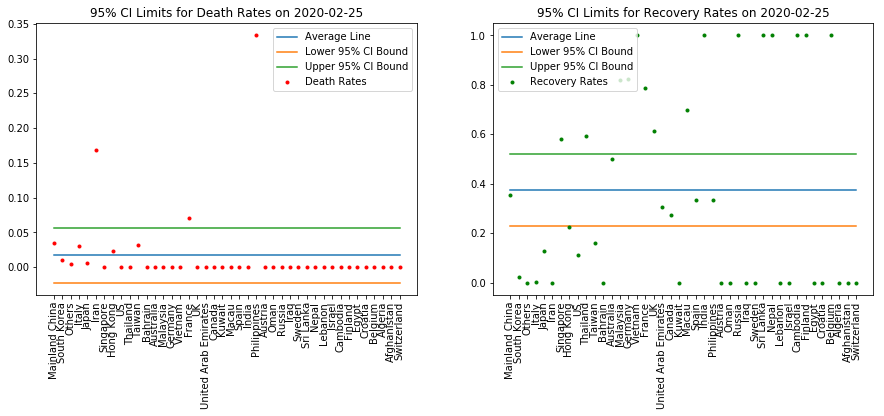

In [111]:
fig, ax =  plt.subplots(1, 2, figsize=(15, 5))

dr_average = agg_df['Death Rate'].mean()
num = agg_df['Death Rate'].count()
rcl = np.ones(num)*dr_average
rucl = np.ones(num)*(dr_average + 1.96*np.sqrt(dr_average*(1-dr_average)/num))
rlcl = np.ones(num)*(dr_average - 1.96*np.sqrt(dr_average*(1-dr_average)/num))
dr = agg_df['Death Rate']
p_rcl = ax[0].plot(x, rcl)
p_rlcl = ax[0].plot(x, rlcl)
p_rucl = ax[0].plot(x, rucl)
p_rdr = ax[0].plot(x, dr, 'r.')
ax[0].legend((p_rcl[0], p_rlcl[0], p_rucl[0], p_dr[0]), ('Average Line', 'Lower 95% CI Bound', 'Upper 95% CI Bound', 'Death Rates'))
ax[0].set_title('95% CI Limits for Death Rates on 2020-02-25')
ax[0].set_xticklabels(ind, rotation=90)

rr_average = agg_df['Recovery Rate'].mean()
num = agg_df['Recovery Rate'].count()
rcl = np.ones(num)*rr_average
rucl = np.ones(num)*(rr_average + 1.96*np.sqrt(rr_average*(1-rr_average)/num))
rlcl = np.ones(num)*(rr_average - 1.96*np.sqrt(rr_average*(1-rr_average)/num))
rr = agg_df['Recovery Rate']
p_rcl = ax[1].plot(x, rcl)
p_rlcl = ax[1].plot(x, rlcl)
p_rucl = ax[1].plot(x, rucl)
p_rr = ax[1].plot(x, rr, 'g.')
ax[1].legend((p_rcl[0], p_rlcl[0], p_rucl[0], p_rr[0]), ('Average Line', 'Lower 95% CI Bound', 'Upper 95% CI Bound', 'Recovery Rates'))
ax[1].set_title('95% CI Limits for Recovery Rates on 2020-02-25')
ax[1].set_xticklabels(ind, rotation=90)

plt.show()

In [114]:
high_dr_df = agg_df.where(agg_df['Death Rate'] > dr_average + 1.96*np.sqrt(dr_average*(1-dr_average)/num)).dropna()
high_rr_df = agg_df.where(agg_df['Recovery Rate'] > rr_average + 1.96*np.sqrt(rr_average*(1-rr_average)/num)).dropna()
low_rr_df = agg_df.where(agg_df['Recovery Rate'] < rr_average - 1.96*np.sqrt(rr_average*(1-rr_average)/num)).dropna()

In [115]:
high_dr_df

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Death Rate Lower 95% CI Bound,Death Rate Upper 95% CI Bound,Recovery Rate Lower 95% CI Bound,Recovery Rate Upper 95% CI Bound
Country/Region,,,,,,,,,
Iran,95.0,16.0,0.0,0.168421,0.000000,0.093165,0.243678,0.000000,0.000000
France,14.0,1.0,11.0,0.071429,0.785714,0.000000,0.206336,0.570772,1.000656
Philippines,3.0,1.0,1.0,0.333333,0.333333,0.000000,0.866778,0.000000,0.866778


In [116]:
high_rr_df

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Death Rate Lower 95% CI Bound,Death Rate Upper 95% CI Bound,Recovery Rate Lower 95% CI Bound,Recovery Rate Upper 95% CI Bound
Country/Region,,,,,,,,,
Singapore,91.0,0.0,53.0,0.000000,0.582418,0.0,0.000000,0.481091,0.683744
Thailand,37.0,0.0,22.0,0.000000,0.594595,0.0,0.000000,0.436393,0.752796
Malaysia,22.0,0.0,18.0,0.000000,0.818182,0.0,0.000000,0.657010,0.979353
Germany,17.0,0.0,14.0,0.000000,0.823529,0.0,0.000000,0.642309,1.004750
Vietnam,16.0,0.0,16.0,0.000000,1.000000,0.0,0.000000,1.000000,1.000000
France,14.0,1.0,11.0,0.071429,0.785714,0.0,0.206336,0.570772,1.000656
UK,13.0,0.0,8.0,0.000000,0.615385,0.0,0.000000,0.350918,0.879851
Macau,10.0,0.0,7.0,0.000000,0.700000,0.0,0.000000,0.415969,0.984031
India,3.0,0.0,3.0,0.000000,1.000000,0.0,0.000000,1.000000,1.000000


In [117]:
low_rr_df

,Confirmed,Deaths,Recovered,Death Rate,Recovery Rate,Death Rate Lower 95% CI Bound,Death Rate Upper 95% CI Bound,Recovery Rate Lower 95% CI Bound,Recovery Rate Upper 95% CI Bound
Country/Region,,,,,,,,,
South Korea,977.0,10.0,22.0,0.010235,0.022518,0.003924,0.016547,0.013215,0.031821
Others,691.0,3.0,0.0,0.004342,0.000000,0.000000,0.009244,0.000000,0.000000
Italy,322.0,10.0,1.0,0.031056,0.003106,0.012109,0.050003,0.000000,0.009183
Japan,170.0,1.0,22.0,0.005882,0.129412,0.000000,0.017378,0.078954,0.179869
Iran,95.0,16.0,0.0,0.168421,0.000000,0.093165,0.243678,0.000000,0.000000
Hong Kong,84.0,2.0,19.0,0.023810,0.226190,0.000000,0.056413,0.136722,0.315659
US,53.0,0.0,6.0,0.000000,0.113208,0.000000,0.000000,0.027904,0.198511
Taiwan,31.0,1.0,5.0,0.032258,0.161290,0.000000,0.094456,0.031816,0.290765
Bahrain,23.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [130]:
warn_df = low_rr_df.merge(high_dr_df, left_index=True, right_index = True)
warn_df

,Confirmed_x,Deaths_x,Recovered_x,Death Rate_x,Recovery Rate_x,Death Rate Lower 95% CI Bound_x,Death Rate Upper 95% CI Bound_x,Recovery Rate Lower 95% CI Bound_x,Recovery Rate Upper 95% CI Bound_x,Confirmed_y,Deaths_y,Recovered_y,Death Rate_y,Recovery Rate_y,Death Rate Lower 95% CI Bound_y,Death Rate Upper 95% CI Bound_y,Recovery Rate Lower 95% CI Bound_y,Recovery Rate Upper 95% CI Bound_y
Country/Region,,,,,,,,,,,,,,,,,,
Iran,95.0,16.0,0.0,0.168421,0.0,0.093165,0.243678,0.0,0.0,95.0,16.0,0.0,0.168421,0.0,0.093165,0.243678,0.0,0.0
